In [ ]:
#https://www.kaggle.com/datasets/gunjansanjaykadam/glioma/data

import matplotlib.pyplot as plt
healthy_base_dir = '/kaggle/input/glioma/Brain Tumor Data Set/Healthy'
tumor_base_dir = '/kaggle/input/glioma/Brain Tumor Data Set/Brain Tumor'

train_dir = 'dataset/train'
val_dir = 'dataset/val'
test_dir = 'dataset/test'

categories = {
    'healthy': healthy_base_dir,
    'tumor': tumor_base_dir
}

for split_dir in [train_dir, val_dir, test_dir]:
    os.makedirs(split_dir, exist_ok=True)
    for category in categories.keys():
        category_split_dir = os.path.join(split_dir, category)
        os.makedirs(category_split_dir, exist_ok=True)

def list_images(directory):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
    return [os.path.join(directory, img) for img in os.listdir(directory)
            if img.lower().endswith(valid_extensions)]

all_images = []
for category, directory in categories.items():
    images = list_images(directory)
    all_images.extend([(img_path, category) for img_path in images])


random_state = 42
train_images, temp_images = train_test_split(
    all_images, test_size=0.4, stratify=[x[1] for x in all_images], random_state=random_state)

val_images, test_images = train_test_split(
    temp_images, test_size=0.5, stratify=[x[1] for x in temp_images], random_state=random_state)


def copy_images(image_list, destination_dir):
    for img_path, category in image_list:
        dest_path = os.path.join(destination_dir, category, os.path.basename(img_path))
        shutil.copy2(img_path, dest_path)

copy_images(train_images, train_dir)
copy_images(val_images, val_dir)
copy_images(test_images, test_dir)

print("Dataset split completed successfully!")
print(f"Training samples: {len(train_images)}")
print(f"Validation samples: {len(val_images)}")
print(f"Testing samples: {len(test_images)}")


Dataset split completed successfully!

Training samples: 2708

Validation samples: 903

Testing samples: 903


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 2708 images belonging to 2 classes.

Found 903 images belonging to 2 classes.

Found 903 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_generator, epochs=8, validation_data=validation_generator)

Epoch 1/8

85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.6216 - loss: 0.7834 - val_accuracy: 0.7829 - val_loss: 0.4724

Epoch 2/8

85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.8125 - loss: 0.4217 - val_accuracy: 0.8516 - val_loss: 0.3669

Epoch 3/8

85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8677 - loss: 0.3155 - val_accuracy: 0.9214 - val_loss: 0.2483

Epoch 4/8

85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9162 - loss: 0.2185 - val_accuracy: 0.9502 - val_loss: 0.1532

Epoch 5/8

85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9548 - loss: 0.1274 - val_accuracy: 0.9457 - val_loss: 0.1553

Epoch 6/8

85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.9675 - loss: 0.0887 - val_accuracy: 0.9712 - val_loss: 0.1187

Epoch 7/8

85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9810 - loss: 0.0548 - val_accuracy: 0.9612 - val_loss: 0.1371

Epoch 8/8

85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9893 - loss: 0.0364 - val_accurac

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9630 - loss: 0.1368

Test accuracy: 0.961240291595459


In [ ]:
from sklearn.metrics import classification_report


y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)


y_true = test_generator.classes


report = classification_report(y_true, y_pred, target_names=['healthy', 'tumor'])
print(report)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step

              precision    recall  f1-score   support



     healthy       0.96      0.95      0.96       418

       tumor       0.96      0.97      0.96       485



    accuracy                           0.96       903

   macro avg       0.96      0.96      0.96       903

weighted avg       0.96      0.96      0.96       903




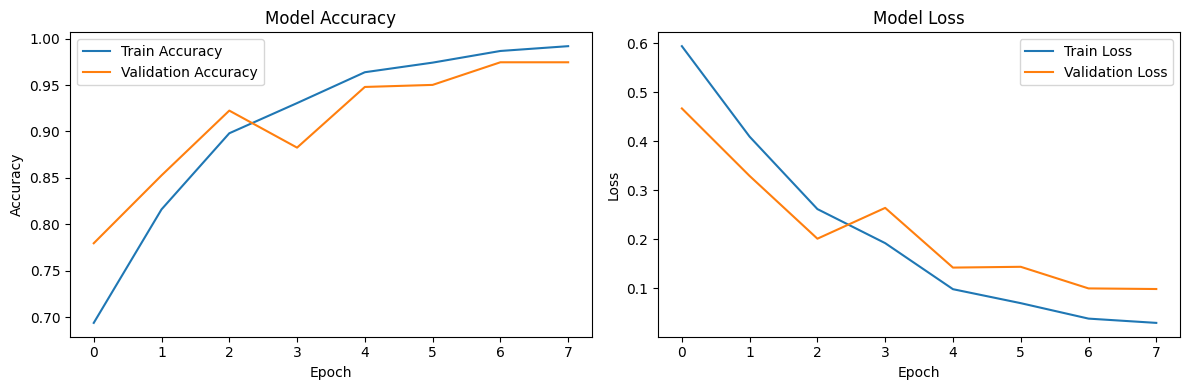

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 512)                 │      19,033,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,102,533 (217.83 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,068,356 (145.22 MB)

In [ ]:
model.get_layer('sequential_3').summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,033,664 (72.61 MB)

 Trainable params: 19,033,664 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import tensorflow.keras.backend as K

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Generates a heatmap using Grad-CAM

    Arguments:
    img_array -- Preprocessed image array with shape (1, height, width, channels)
    model -- The trained model
    last_conv_layer_name -- The name of the last convolutional layer in the model
    pred_index -- Index of the predicted class (optional)

    Returns:
    heatmap -- Generated Grad-CAM heatmap
    """

    _ = model(model.inputs)

    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    if grads is None:
        print(f"Warning: Gradients for layer '{last_conv_layer_name}' are None. Returning zero heatmap.")
        return np.zeros_like(img_array[0, :, :, 0])


    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))


    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step



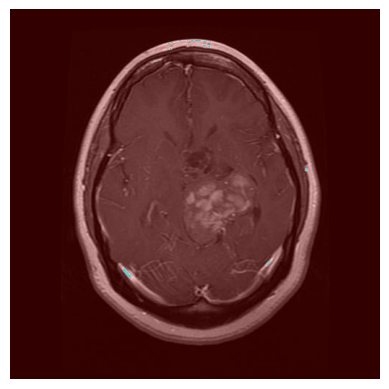

In [ ]:
def display_gradcam(img_path, model, last_conv_layer_name, heatmap, cam_path="cam.jpg", alpha=0.4):

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))


    heatmap = np.uint8(255 * heatmap)


    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)


    superimposed_img = heatmap * alpha + img

    cv2.imwrite(cam_path, superimposed_img)

    plt.imshow(superimposed_img.astype(np.uint8))
    plt.axis('off')
    plt.show()



img_path = '/kaggle/input/glioma/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg'
img = cv2.imread(img_path)
if img is None:
    print(f"Error: Could not load image from {img_path}. Please check the path.")
else:
    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    img_array = np.expand_dims(img, axis=0)

predictions = model.predict(img_array)


pred_class_index = np.argmax(predictions[0])


heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name='conv2d_20', pred_index=pred_class_index)

display_gradcam(img_path, model, last_conv_layer_name='conv2d_20', heatmap=heatmap)


In [ ]:
class_label = "No Tumor" if pred_class_index == 1 else "Tumor"
prediction_confidence = predictions[0][pred_class_index] if predictions is not None else 0
print(f"Image: {img_path}, Predicted Class: {class_label}, Prediction Confidence: {prediction_confidence:.2f}")

Image: /kaggle/input/glioma/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg, Predicted Class: Tumor, Prediction Confidence: 1.00
